In [ ]:
# Excersice k means clustering

In [88]:
import numpy as np
import cv2
print(cv2.__version__)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
%matplotlib inline

3.3.0


In [86]:
img1 = cv2.imread('./data/cardinal.jpg',1)
img2 = cv2.imread('./data/mountain.jpg',1)

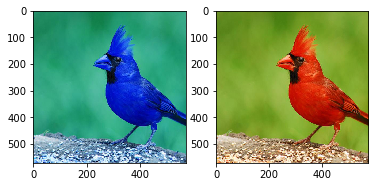

In [87]:
# to check rgb to bgr conversion
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
fig,ax = plt.subplots(1,2)
ax[0].imshow(img1)
ax[1].imshow(img1_rgb)

In [6]:
def ClustMajorColors(img,k):
    img_bgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_flt = np.float32(img_bgr.reshape(-1,3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    attempts = 10
    flag = cv2.KMEANS_RANDOM_CENTERS
    ret,label,center=cv2.kmeans(img_flt,k,None,criteria,attempts,flag)
    center_uint8 = np.uint8(center)
       
    return(ret, label, center_uint8)

In [22]:
r1,l1,c1 = ClustMajorColors(img1,3)
r2,l2,c2 = ClustMajorColors(img2,3)

In [104]:
# plot image with bar next to it.

def plot_WithColor(img,l,c):
    fig,ax=plt.subplots(1,1)
    img_bgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


    width,height,colorChannel = img.shape
    numBox= len(c)
    heightBox = height/numBox
    color = np.divide(c,255)

    for numBox in range(numBox):
        widthBox= np.divide(np.sum(l==numBox),l.size)
        ax.add_patch(mpatch.Rectangle((width,heightBox*numBox), width*widthBox, heightBox, color = color[numBox]))

    ax.imshow(img_bgr)
    ax.set_xlim(0,width*2)

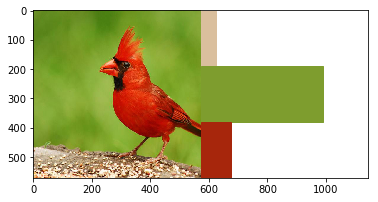

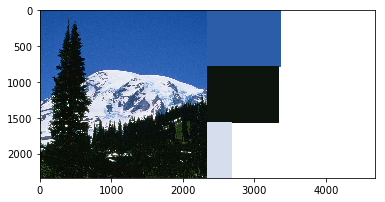

In [105]:
plot_WithColor(img1,l1,c1)
plot_WithColor(img2,l2,c2)